<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#CRIM - per capita crime rate by town

#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#INDUS - proportion of non-retail business acres per town.

#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#NOX - nitric oxides concentration (parts per 10 million)

#RM - average number of rooms per dwelling

#AGE - proportion of owner-occupied units built prior to 1940

#DIS - weighted distances to five Boston employment centres

#RAD - index of accessibility to radial highways

#TAX - full-value property-tax rate per $10,000

#PTRATIO - pupil-teacher ratio by town

#LSTAT - % lower status of the population

#MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Descriptive Statistics and Visualizations

Text(0.5, 1.0, 'Median value of owner-occupied homes')

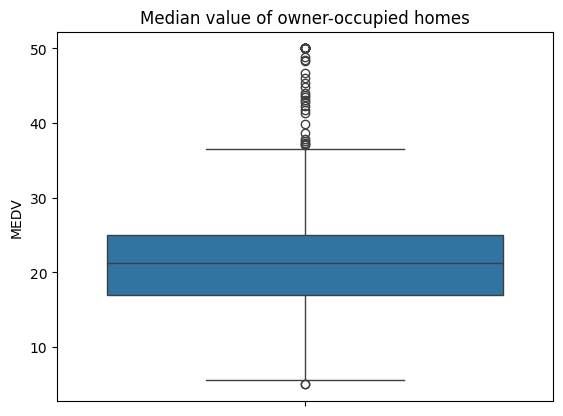

In [7]:
# Boxplot of "Median value of owner-occupied homes"
x = sns.boxplot(data=boston_df, y = 'MEDV')
x.set_title("Median value of owner-occupied homes")

<ipython-input-8-eb01b31c5988>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(['Far_from_river', 'Near_river'])


[Text(0, 10, '22.09'), Text(0, 10, '28.44')]

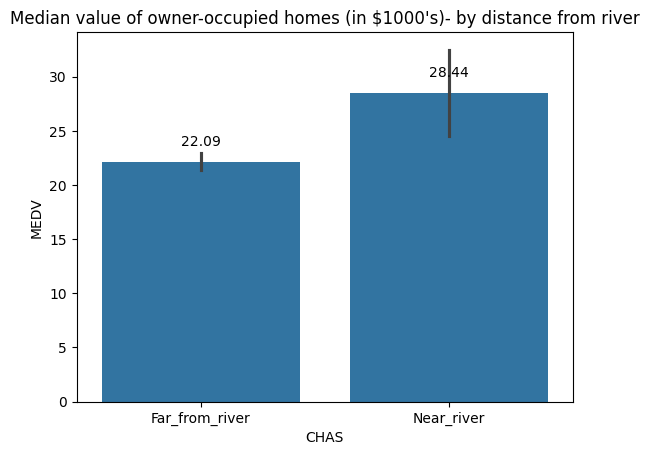

In [8]:
# Bar plot for the Charles river variable
x = sns.barplot(data = boston_df,x = 'CHAS', y = 'MEDV')
x.set_xticklabels(['Far_from_river', 'Near_river'])
x.set_title("Median value of owner-occupied homes (in $1000's)- by distance from river")
x.bar_label(x.containers[0],fmt='%.2f',padding=10)

[Text(0, 10, '27.78'), Text(0, 10, '24.95'), Text(0, 10, '19.79')]

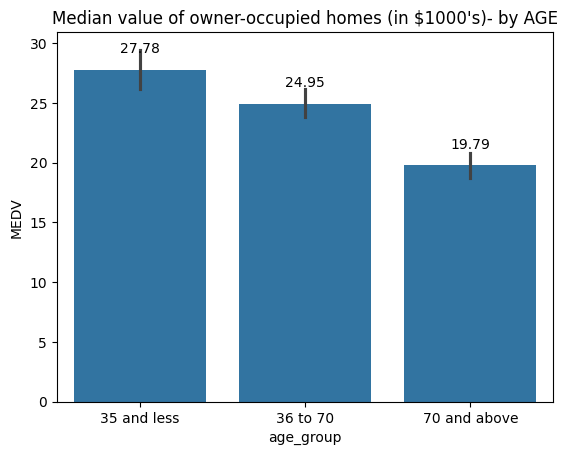

In [9]:
#Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
#first i created the 3 required groups
boston_df.loc[(boston_df['AGE']<=35,'age_group')]='35 and less'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='36 to 70'
boston_df.loc[(boston_df['AGE']>=70,'age_group')]='70 and above'

#order variable will allow me to reorder the barplot by age
order=['35 and less','36 to 70','70 and above']

#create the bar plot
x=sns.barplot(data=boston_df,x='age_group',y='MEDV',order=order)
x.set_title("Median value of owner-occupied homes (in $1000's)- by AGE")
x.bar_label(x.containers[0],fmt='%.2f',padding=10)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

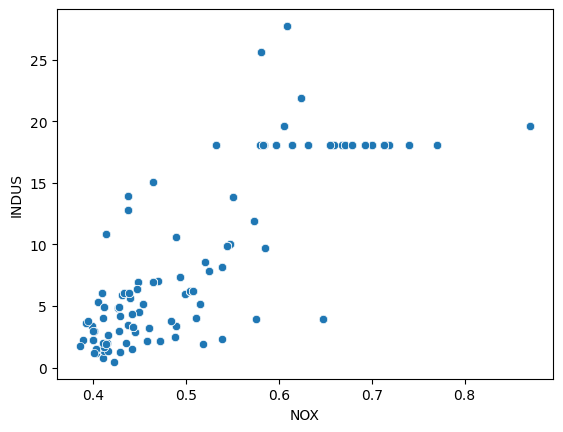

In [10]:
#Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(data=boston_df,x='NOX',y='INDUS')

#There is quite strong positive relationship between these 2 values (high NOX correlate with high INDUS, the same for low values)


<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

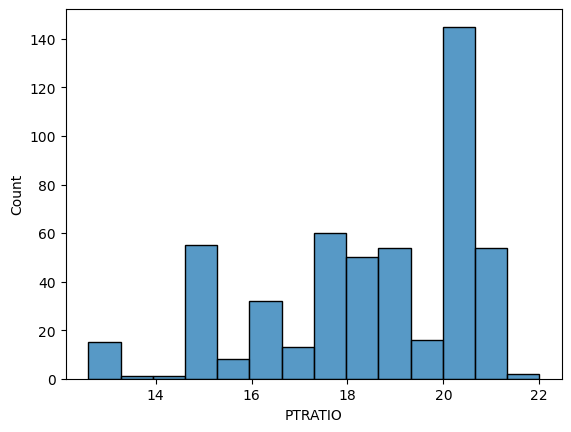

In [11]:
#Histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df,x='PTRATIO')

## Task 3: Statistical Tests
Use α = 0.05

In [12]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

print(f"Statistical info on the two groups:\n{boston_df.groupby('CHAS')['MEDV'].describe().round(2)}")
print("CHAS=0- houese far from the river,\nCHAS=1- houses near the river")

#Levene test to check if the 2 group's variance are equal
print("""\nLevene test's hypothesis:
Null hypothesis: The median values of houses' variance of houses near the Charles river and houses far from the river are equal
Alternative hypothesis: The median values of houses' variance of the two groups are different\n""")

lev_stat,lev_p=scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])
#pvalue=0.032- we reject the null hypothesis, the variances are different
print(f"Levene-test result: p-value is {round(lev_p,4)}, we reject the null hypothesis\n")

#t-test to check if the difference between the two groups in MEDV is significant
print("""t-test hypothesis:
Null hypothesis: The difference between houses near the Charles river and houses far from the river in MEDV isn't significant
Alternative hypothesis: There is significant difference between houses near the Charles river and houses far from the river in MEDV""")

stat,p_val=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=False)
#pvalue=0.0036- we reject the null hypothesis, the difference in MEDV is significant
print(f"\nt-test result: p-value is {round(p_val,4)}, we reject the null hypothesis")

Statistical info on the two groups:
      count   mean    std   min   25%   50%    75%   max
CHAS                                                    
0.0   471.0  22.09   8.83   5.0  16.6  20.9  24.80  50.0
1.0    35.0  28.44  11.82  13.4  21.1  23.3  33.15  50.0
CHAS=0- houese far from the river,
CHAS=1- houses near the river

Levene test's hypothesis:
Null hypothesis: The median values of houses' variance of houses near the Charles river and houses far from the river are equal
Alternative hypothesis: The median values of houses' variance of the two groups are different

Levene-test result: p-value is 0.0326, we reject the null hypothesis

t-test hypothesis:
Null hypothesis: The difference between houses near the Charles river and houses far from the river in MEDV isn't significant
Alternative hypothesis: There is significant difference between houses near the Charles river and houses far from the river in MEDV

t-test result: p-value is 0.0036, we reject the null hypothesis


In [13]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#statistical info on the 3 AGE groups
print(f"Statistical info on the 3 AGE groups:\n{boston_df.groupby('age_group')['MEDV'].describe()}\n")

#create 3 variables that contains the MEDV's values of the age groups
low_group=boston_df.loc[(boston_df['age_group']=='35 and less')]['MEDV']
middle_group=boston_df.loc[(boston_df['age_group']=='36 to 70')]['MEDV']
top_group=boston_df.loc[(boston_df['age_group']=='70 and above')]['MEDV']

#ANOVA test to check if the difference between the AGE groups in MEDV is significant
print("""ANOVA test hypothesis:
Null hypothesis: Samples in all AGE groups are from populations with the same mean values 
Alternative hypothesis: The means of the populations are not the same""")

f_stat,f_pval=scipy.stats.f_oneway(low_group,middle_group,top_group)
#pvalue=1.7105011022702984e-15 - we reject the null hypothesis, the means of the groups are not the same
print(f"\nANOVA test result: p-value is {f_pval}, we reject the null hypothesis")

Statistical info on the 3 AGE groups:
              count       mean       std   min     25%   50%     75%   max
age_group                                                                 
35 and less    91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
36 to 70      128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
70 and above  287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0

ANOVA test hypothesis:
Null hypothesis: Samples in all AGE groups are from populations with the same mean values 
Alternative hypothesis: The means of the populations are not the same

ANOVA test result: p-value is 1.7105011022702984e-15, we reject the null hypothesis


In [14]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#Pearson correlation test to check if their is a relationship between NOX and INDUS and its attributes
print("""Pearson correlation hypothesis:
Null hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town""")

pear_stat,pear_pval=scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print(f"\nPearson correlation result: pvalue={pear_pval}, statistic= {round(pear_stat,3)}. \nWe reject the null hypothesis- there is strong positive correlation between the 2 variables")


Pearson correlation hypothesis:
Null hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

Pearson correlation result: pvalue=7.913361061210442e-98, statistic= 0.764. 
We reject the null hypothesis- there is strong positive correlation between the 2 variables


In [15]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Regression analysis to check the impact (connection between these two variables)
x=boston_df['DIS'] #Independent variable
y=boston_df['MEDV'] #Dependent variable

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

print(model.summary())

print("\nWe reject the null hypothesis, p-value equal to 0")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        15:52:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0